In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sea
from scipy.interpolate import RectBivariateSpline
from mpl_toolkits.mplot3d import Axes3D

#custom modules
from plotting import create_3D_loss_manifold

sea.set(style="white")

In [112]:
def loadmaxsics_pd(m1, m2):
    
    msicandstd1 = np.load(f"data/maxsicandstd1_notebook{float(m1)}{float(m2)}.npy", allow_pickle = True).item()
    msicandstd2 = np.load(f"data/maxsicandstd2_notebook{float(m1)}{float(m2)}.npy", allow_pickle = True).item()

    msic1_ensemble = []
    std1_ensemble = []
    msic2_ensemble = []
    std2_ensemble = []
    sigspace = np.logspace(-3,-1,10)
    for sig in sigspace:
        msic1_ensemble.append(msicandstd1[sig][0])
        std1_ensemble.append(msicandstd1[sig][1])
        msic2_ensemble.append(msicandstd2[sig][0])
        std2_ensemble.append(msicandstd2[sig][1])

    msic1_ensemble = np.array(msic1_ensemble)
    std1_ensemble = np.array(std1_ensemble)
    msic2_ensemble = np.array(msic2_ensemble)
    std2_ensemble = np.array(std2_ensemble)

    maxsicdata_pd = pd.DataFrame({
        "Semi Weak Max Sics": msic1_ensemble,
        "Semi Weak Max Sic Std": std1_ensemble,
        "CWOLA Max Sics": msic2_ensemble,
        "CWOLA Max Sic Std": std2_ensemble,
    })

    maxsicdata_pd.index = sigspace
    maxsicdata_pd.index.name = "Signal fraction"


    return maxsicdata_pd

In [113]:
loadmaxsics_pd(5, 1)

,Semi Weak Max Sics,Semi Weak Max Sic Std,CWOLA Max Sics,CWOLA Max Sic Std
Signal fraction,,,,
0.001000,3.263735,2.987079,1.000081,0.132520
0.001668,3.239173,5.884487,1.161471,0.225975
0.002783,2.932333,1.895720,1.045598,0.159622
0.004642,3.527725,4.941947,1.514406,0.450034
0.007743,2.791376,5.398638,2.671483,1.317754
0.012915,3.115922,0.817066,5.229767,0.328097
0.021544,4.613945,4.963681,6.297614,0.441618
0.035938,5.590471,6.439848,7.012822,0.194032
0.059948,7.316448,4.945512,7.707467,0.335359


In [115]:
#loadmaxsics_pd(3, 3)

In [4]:
msicandstd1

{0.1: (27.910284553115087, 0.1509185360745794),
 0.05994842503189409: (27.569574321596843, 0.24158632944740427),
 0.03593813663804626: (27.56667345632414, 4.355123876880812),
 0.021544346900318832: (20.666270613580746, 9.649549073445822),
 0.01291549665014884: (27.758309636830344, 9.744494705619264),
 0.007742636826811269: (11.506970307902801, 8.409108194432008),
 0.004641588833612777: (5.199913977567961, 3.9645956429454587),
 0.0027825594022071257: (5.8830703199759, 3.0846378423533554),
 0.0016681005372000592: (2.547927188571415, 2.2033752440005427),
 0.001: (4.742700074391929, 3.2407681693696837)}

In [84]:
m1 = 3
m2 = 3
msicandstd1 = np.load(f"data/maxsicandstd1_script{float(m1)}{float(m2)}.npy", allow_pickle = True).item()
msicandstd2 = np.load(f"data/maxsicandstd2_script{float(m1)}{float(m2)}.npy", allow_pickle = True).item()

msic1_ensemble = []
std1_ensemble = []
msic2_ensemble = []
std2_ensemble = []
sigspace = np.logspace(-3,-1,10)
for sig in sigspace:
    msic1_ensemble.append(msicandstd1[sig][0])
    std1_ensemble.append(msicandstd1[sig][1])
    msic2_ensemble.append(msicandstd2[sig][0])
    std2_ensemble.append(msicandstd2[sig][1])

msic1_ensemble = np.array(msic1_ensemble)
std1_ensemble = np.array(std1_ensemble)
msic2_ensemble = np.array(msic2_ensemble)
std2_ensemble = np.array(std2_ensemble)

maxsicdata_pd = pd.DataFrame({
    "Semi Weak Max Sics": msic1_ensemble,
    "Semi Weak Max Sic Std": std1_ensemble,
    "CWOLA Max Sics": msic2_ensemble,
    "CWOLA Max Sic Std": std2_ensemble,
})

maxsicdata_pd.index = sigspace
maxsicdata_pd.index.name = "Signal fraction"
maxsicdata_pd

,Semi Weak Max Sics,Semi Weak Max Sic Std,CWOLA Max Sics,CWOLA Max Sic Std
Signal fraction,,,,
0.001000,4.742700,3.240768,1.367131,0.478059
0.001668,2.547927,2.203375,1.031395,0.075775
0.002783,5.883070,3.084638,1.399733,0.303598
0.004642,5.199914,3.964596,3.590441,1.273853
0.007743,11.506970,8.409108,10.904769,2.803571
0.012915,27.758310,9.744495,14.423079,1.104973
0.021544,20.666271,9.649549,17.006564,1.216417
0.035938,27.566673,4.355124,20.008676,1.488198
0.059948,27.569574,0.241586,21.311526,0.907995


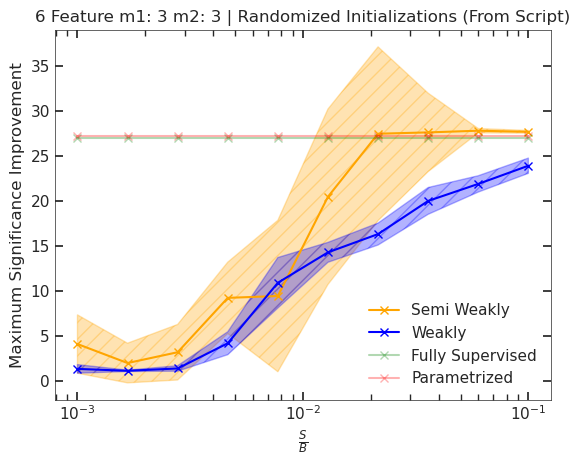

/global/homes/g/gupsingh/.local/perlmutter/python-3.11/lib/python3.11/site-packages/slack_sdk/web/internal_utils.py:417: UserWarning: client.files_upload() may cause some issues like timeouts for relatively large files. Our latest recommendation is to use client.files_upload_v2(), which is mostly compatible and much stabler, instead.
  warnings.warn(message)


Plot sent successfully: None


In [89]:
import pickle
#from utils import send_slack_plot

m1, m2 = 3, 3

sigspace = np.logspace(-3, -1, 10)
plt.figure()
sea.set(style="white")
plt.plot(sigspace, msic1_runs_plot, marker = "x", label='Semi Weakly', color='orange')
plt.plot(sigspace, msic2_runs_plot, marker = "x", label='Weakly', color='blue')
plt.plot(sigspace, [27.0314350978661]*len(sigspace), marker = "x", label='Fully Supervised', color='green', alpha = 0.3)
plt.plot(sigspace, [27.17299849612719]*len(sigspace), marker = "x", label='Parametrized', color='red', alpha = 0.3)

plt.fill_between(sigspace, msic1_runs_plot - msic1std_runs_plot, msic1_runs_plot + msic1std_runs_plot, color='orange', alpha=0.3, hatch = "//")
plt.fill_between(sigspace, msic2_runs_plot - msic2std_runs_plot, msic2_runs_plot + msic2std_runs_plot, color='blue', alpha=0.3, hatch = "//")
#plt.fill_between(sigspace, avgmsic3 - msicstds3, avgmsic3 + msicstds3, color='green', alpha=0.3, hatch = "//")
#plt.fill_between(sig_space, avgmsic4 - msicstds4, avgmsic4 + msicstds4, color='green', alpha=0.3, hatch = "//")

sea.set(style="white")
plt.xlabel(r'$\frac{S}{B}$')
plt.ylabel('Maximum Significance Improvement')
plt.title(f'6 Feature m1: {m1} m2: {m2} | Randomized Initializations (From Script)')
plt.xscale("log")
plt.legend(loc="lower right",frameon=False)
plt.gca().spines['left'].set_linewidth(0.5)
plt.gca().spines['bottom'].set_linewidth(0.5)
plt.gca().spines['top'].set_linewidth(0.5)
plt.gca().spines['right'].set_linewidth(0.5)
plt.tick_params(axis='both', which='both', direction='in', top=True, right=True)
plt.tick_params(axis='both', which='both', direction='in', bottom=True, left=True)
img_path = "plots/maxsicplot65k33.png"
#plt.savefig(img_path, dpi=450, bbox_inches='tight')
plt.show()
send_slack_plot(img_path)

In [86]:
maxsic1_runs_plot = maxsicdata_pd["Semi Weak Max Sics"]
maxsic2_runs_plot = maxsicdata_pd["CWOLA Max Sics"]
msic1std_runs_plot = maxsicdata_pd["Semi Weak Max Sic Std"]
msic2std_runs_plot = maxsicdata_pd["CWOLA Max Sic Std"]

In [56]:
msic1_runs = np.load("data/msic1_median33.npy", allow_pickle = True)
msic2_runs = np.load("data/msic2_median33.npy", allow_pickle = True)
msic1std_runs = np.load("data/std1_median33.npy", allow_pickle = True)
msic2std_runs = np.load("data/std2_median33.npy", allow_pickle = True)
weight_list1_runs33 = np.load("data/weight_list1_runs33.npy", allow_pickle = True)
weight_list2_runs33 = np.load("data/weight_list2_runs33.npy", allow_pickle = True)
weight_list3_runs33 = np.load("data/weight_list3_runs33.npy", allow_pickle = True)

In [57]:
msic1_runs

array([27.80012926, 27.67757194])

In [58]:
msic1_runs_2 = np.load("data/msic1_median33_2.npy", allow_pickle = True)
msic2_runs_2 = np.load("data/msic2_median33_2.npy", allow_pickle = True)
msic1std_runs_2 = np.load("data/std1_median33_2.npy", allow_pickle = True)
msic2std_runs_2 = np.load("data/std2_median33_2.npy", allow_pickle = True)
weight_list1_runs33_2 = np.load("data/weight_list1_runs33_2.npy", allow_pickle = True)
weight_list2_runs33_2 = np.load("data/weight_list2_runs33_2.npy", allow_pickle = True)
weight_list3_runs33_2 = np.load("data/weight_list3_runs33_2.npy", allow_pickle = True)

In [59]:
msic1_runs_2

array([ 4.10005401,  1.98997225,  3.19145142,  9.231583  ,  9.43653325,
       20.46237718, 27.46610011, 27.6154108 ])

In [60]:
msic1_runs_plot = np.concatenate([msic1_runs_2, msic1_runs])
msic2_runs_plot = np.concatenate([msic2_runs_2, msic2_runs])
msic1std_runs_plot = np.concatenate([msic1std_runs_2, msic1std_runs])
msic2std_runs_plot = np.concatenate([msic2std_runs_2, msic2std_runs])

In [7]:
# msic1_runs = np.load("msic1_median2.npy", allow_pickle = True)
# msic2_runs = np.load("msic2_median2.npy", allow_pickle = True)
# msic1_stds = np.load("msic1_std2.npy", allow_pickle = True)
# msic2_stds = np.load("msic2_stds2.npy", allow_pickle = True)
# msic1_runs

In [62]:
msic1_runs = np.load("data/msic1_median_test.npy", allow_pickle = True)
msic2_runs = np.load("data/msic2_median_test.npy", allow_pickle = True)
msic1std_runs = np.load("data/msic1_std_test.npy", allow_pickle = True)
msic2std_runs = np.load("data/msic2_std_test.npy", allow_pickle = True)
msic1_runs

array([ 2.92734998,  2.92783794,  2.29259604,  3.02682244,  3.7900691 ,
       22.61388261, 22.30287109, 22.84938631, 22.9282612 , 23.01205837])

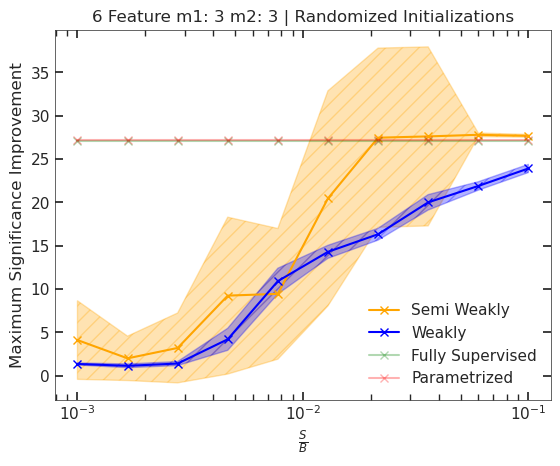

Plot sent successfully: None


In [64]:
import pickle
from utils import send_slack_plot

m1, m2 = 3, 3

sigspace = np.logspace(-3, -1, 10)
plt.figure()
sea.set(style="white")
plt.plot(sigspace, msic1_runs_plot, marker = "x", label='Semi Weakly', color='orange')
plt.plot(sigspace, msic2_runs_plot, marker = "x", label='Weakly', color='blue')
plt.plot(sigspace, [27.0314350978661]*len(sigspace), marker = "x", label='Fully Supervised', color='green', alpha = 0.3)
plt.plot(sigspace, [27.17299849612719]*len(sigspace), marker = "x", label='Parametrized', color='red', alpha = 0.3)

plt.fill_between(sigspace, msic1_runs_plot - msic1std_runs_plot, msic1_runs_plot + msic1std_runs_plot, color='orange', alpha=0.3, hatch = "//")
plt.fill_between(sigspace, msic2_runs_plot - msic2std_runs_plot, msic2_runs_plot + msic2std_runs_plot, color='blue', alpha=0.3, hatch = "//")
#plt.fill_between(sigspace, avgmsic3 - msicstds3, avgmsic3 + msicstds3, color='green', alpha=0.3, hatch = "//")
#plt.fill_between(sig_space, avgmsic4 - msicstds4, avgmsic4 + msicstds4, color='green', alpha=0.3, hatch = "//")

sea.set(style="white")
plt.xlabel(r'$\frac{S}{B}$')
plt.ylabel('Maximum Significance Improvement')
plt.title(f'6 Feature m1: {m1} m2: {m2} | Randomized Initializations')
plt.xscale("log")
plt.legend(loc="lower right",frameon=False)
plt.gca().spines['left'].set_linewidth(0.5)
plt.gca().spines['bottom'].set_linewidth(0.5)
plt.gca().spines['top'].set_linewidth(0.5)
plt.gca().spines['right'].set_linewidth(0.5)
plt.tick_params(axis='both', which='both', direction='in', top=True, right=True)
plt.tick_params(axis='both', which='both', direction='in', bottom=True, left=True)
img_path = "plots/maxsicplot65k33.png"
#plt.savefig(img_path, dpi=450, bbox_inches='tight')
plt.show()

send_slack_plot(img_path)

In [ ]:
# ww_runs = np.load("4Features3Param33Perturb_WEIGHTLIST.npy")
# avgww = np.median(ww_runs, axis = 0)

# fittedw = avgww
# fittedwstd = np.std(ww_runs, axis = 0)
# plt.figure()
# plt.plot(sigspace, fittedw, marker = "x", label='Semi Weakly', color='orange')
# plt.plot(sigspace, sigspace, marker = "", label='S/B', color='black')

# plt.fill_between(sigspace, fittedw - fittedwstd, fittedw + fittedwstd, color='orange', alpha=0.3, hatch = "//")

# plt.xlabel(r'$\frac{S}{B}$')

# plt.ylabel(r'Fitted $\frac{S}{B}$')
# plt.title(f'6 Features 3 Parameters Fitted m1: {3.5} m2: {5.5} | w1: {2} w2: {5}')
# plt.yscale("log")
# plt.xscale("log")
# plt.gca().spines['left'].set_linewidth(0.5)
# plt.gca().spines['bottom'].set_linewidth(0.5)
# plt.gca().spines['top'].set_linewidth(0.5)
# plt.gca().spines['right'].set_linewidth(0.5)
# plt.tick_params(axis='both', which='both', direction='in', top=True, right=True)
# plt.tick_params(axis='both', which='both', direction='in', bottom=True, left=True)
# plt.legend(loc="lower right",frameon=False)
# #plt.savefig('plot.png', dpi=450, bbox_inches='tight')
# plt.show()

In [91]:
# z = np.load("z_6_3_5_1_0.25.npy", allow_pickle = True).item()
# #sigfrac = np.logspace(-3,-1,10)[9]
# m1,m2 = 5, 1
# step = 0.25
# elv = 60
# azim = 20
# create_3D_loss_manifold(0.1, m1, m2, z, step, elv, azim, save = False)

In [107]:
m1 = 5
m2 = 1
msicandstd1 = np.load(f"data/maxsicandstd1_notebook{float(m1)}{float(m2)}.npy", allow_pickle = True).item()
msicandstd2 = np.load(f"data/maxsicandstd2_notebook{float(m1)}{float(m2)}.npy", allow_pickle = True).item()

msic1_ensemble = []
std1_ensemble = []
msic2_ensemble = []
std2_ensemble = []
sigspace = np.flip(np.logspace(-3,-1,10))
for sig in sigspace:
    msic1_ensemble.append(msicandstd1[sig][0])
    std1_ensemble.append(msicandstd1[sig][1])
    msic2_ensemble.append(msicandstd2[sig][0])
    std2_ensemble.append(msicandstd2[sig][1])

msic1_ensemble = np.flip(np.array(msic1_ensemble))
std1_ensemble = np.flip(np.array(std1_ensemble))
msic2_ensemble = np.flip(np.array(msic2_ensemble))
std2_ensemble = np.flip(np.array(std2_ensemble))

In [108]:
msic1_ensemble

array([ 3.26373488,  3.23917341,  2.93233305,  3.52772517,  2.79137566,
        3.11592205,  4.61394539,  5.59047137,  7.31644834, 18.55465685])

In [68]:
msicandstd1.keys()

dict_keys([0.1, 0.05994842503189409, 0.03593813663804626, 0.021544346900318832, 0.01291549665014884, 0.007742636826811269, 0.004641588833612777, 0.0027825594022071257, 0.0016681005372000592, 0.001])

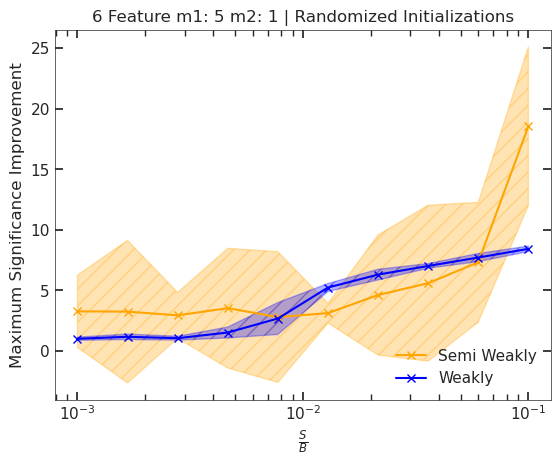

In [109]:
from utils import send_slack_plot

m1, m2 = 5, 1

sigspace = np.logspace(-3, -1, 10)
plt.figure()
sea.set(style="white")
plt.plot(sigspace, msic1_ensemble, marker = "x", label='Semi Weakly', color='orange')
plt.plot(sigspace, msic2_ensemble, marker = "x", label='Weakly', color='blue')

plt.fill_between(sigspace, msic1_ensemble - std1_ensemble, msic1_ensemble + std1_ensemble, color='orange', alpha=0.3, hatch = "//")
plt.fill_between(sigspace, msic2_ensemble - std2_ensemble, msic2_ensemble + std2_ensemble, color='blue', alpha=0.3, hatch = "//")

sea.set(style="white")
plt.xlabel(r'$\frac{S}{B}$')
plt.ylabel('Maximum Significance Improvement')
plt.title(f'6 Feature m1: {m1} m2: {m2} | Randomized Initializations')
plt.xscale("log")
plt.legend(loc="lower right",frameon=False)
plt.gca().spines['left'].set_linewidth(0.5)
plt.gca().spines['bottom'].set_linewidth(0.5)
plt.gca().spines['top'].set_linewidth(0.5)
plt.gca().spines['right'].set_linewidth(0.5)
plt.tick_params(axis='both', which='both', direction='in', top=True, right=True)
plt.tick_params(axis='both', which='both', direction='in', bottom=True, left=True)
img_path = "plots/maxsicplot65k33.png"
#plt.savefig(img_path, dpi=450, bbox_inches='tight')
plt.show()

In [1]:
def create_3D_loss_manifold(sigfrac, m1, m2, z, step, elev, azim, save = False):

    start = 0.5
    end = 6
    step = step

    weight_list = np.arange(start, end + step, step)

    grid_axes = []
    for w1 in weight_list:
        for w2 in weight_list:
            grid_axes.append((w1, w2))

    w1_values, w2_values = zip(*grid_axes)

    loss_values = list(z[sigfrac, m1, m2])

    x = w1_values
    y = w2_values
    z = loss_values

    sea.set(style="whitegrid")
    fig = plt.figure(figsize = (10,8))
    ax = fig.add_subplot(111, projection='3d')

    ax.scatter(x, y, z, c='r', marker='.', alpha = 0.1)
    ax.plot_trisurf(x, y, z, cmap='viridis', edgecolor='none')

    ax.set_xlabel('W1')
    ax.set_ylabel('W2')
    ax.set_zlabel('Loss')
    ax.set_title(f"Loss Manifold m1: {m1} m2: {m2} sigfrac: {np.round(sigfrac, 4)}")

    ax.xaxis.pane.fill = False
    ax.yaxis.pane.fill = False
    ax.zaxis.pane.fill = False

    ax.grid(False)
    
    #ax.set_xticks([])
    #ax.set_yticks([])
    ax.set_zticks([])
    
    ax.view_init(elev=elev, azim=azim)
    
    if save == True:
        plt.savefig(f'plots/manifold{float(m1)}{float(m2)}.png', dpi=450, bbox_inches='tight')
    return ax

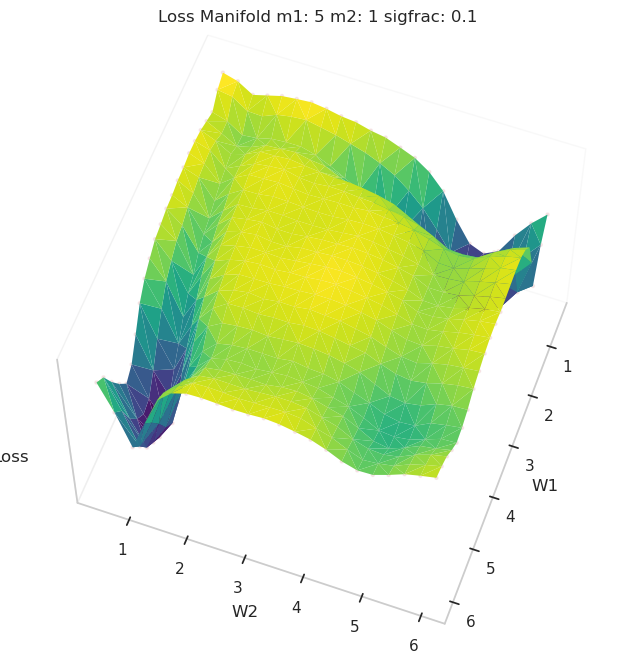

In [7]:
from plotting import create_3D_loss_manifold
z = np.load("z_6_3_5_1_0.25.npy", allow_pickle = True).item()
sigspace = np.logspace(-3,-1,10)[-1]
m1,m2 = 5, 1
step = 0.25
elv = 60
azim = 20
plot = create_3D_loss_manifold(sigspace, m1, m2, z, step, elv, azim, save = False)

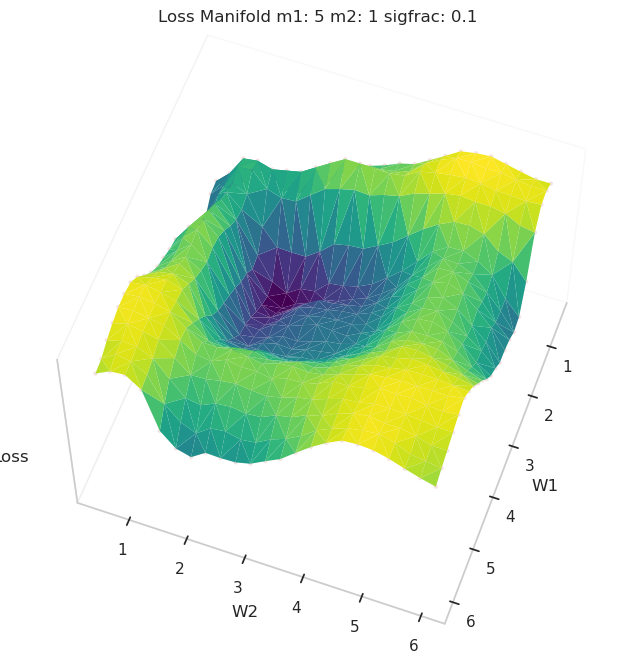

In [10]:
a = np.load("a_63510.25.npy", allow_pickle = True).item()
sigspace = np.logspace(-3,-1,10)[-1]
m1,m2 = 5, 1
step = 0.25
elv = 60
azim = 20
plot = create_3D_loss_manifold(sigspace, m1, m2, a, step, elv, azim, save = False)

In [172]:
def AUC_landscape_nofit(sigfrac, m1, m2, a, step=0.25, save = False):
    start = 0.5
    end = 6
    step = step
    
    weight_list = np.arange(start, end + step, step)
    grid_axes = [(w1, w2) for w1 in weight_list for w2 in weight_list]
    w1_values, w2_values = zip(*grid_axes)

    loss_values = list(a[sigfrac, m1, m2])
    min_loss = min(loss_values)
    max_loss = max(loss_values)
    normalized_loss = [(x - min_loss) / (max_loss - min_loss) for x in loss_values]
    bins = int(np.sqrt(len(z[sigfrac, m1, m2])))

    star1_coords = (m1, m2)
    star2_coords = (m2, m1)

    plt.figure(figsize=(8, 6))
    h = plt.hist2d(w1_values, w2_values, bins=(bins, bins), cmap='viridis', weights=normalized_loss)
    plt.scatter(*star1_coords, c='red', marker='*', s=200, label='Star 1')
    plt.scatter(*star2_coords, c='blue', marker='*', s=200, label='Star 2')
    plt.colorbar(label='Loss (BCE)')
    plt.xlabel('m1')
    plt.ylabel('m2')
    plt.title('6 Features (m1 = {} | m2 = {}) sigfrac AUC Landscape: {:.4f}'.format(m1, m2, sigfrac))
    plt.legend()
    plt.show()
    
    if save == True:
        plt.savefig(f'plots/landscape{float(m1)}{float(m2)}.png', dpi=450, bbox_inches='tight')
    
    return h

In [169]:
def plot_landscapes(sigfrac, m1, m2, z, a, step, save = False):
    start = 0.5
    end = 6
    step = step

    #weightspace
    weight_list = np.arange(start, end + step, step)
    grid_axes = [(w1, w2) for w1 in weight_list for w2 in weight_list]
    w1_values, w2_values = zip(*grid_axes)

    #loss
    loss_values = list(z[sigfrac, m1, m2])
    min_loss = min(loss_values)
    max_loss = max(loss_values)
    
    AUC_values = list(a[sigfrac, m1, m2])
    min_loss = min(AUC_values)
    max_loss = max(AUC_values)
    bins = int(np.sqrt(len(a[sigfrac, m1, m2])))

    star1_coords = (m1, m2)
    star2_coords = (m2, m1)

    fig, ax = plt.subplots(1, 2, figsize=(12, 6))
    ax[0].hist2d(w1_values, w2_values, bins = (bins, bins), cmap='viridis', weights=loss_values)
    ax[0].set_aspect("equal")
    ax[0].set_title(f"Loss Landscape")
    ax[0].set_xlabel(r"$w_{1}$")
    ax[0].set_ylabel(r"$w_{2}$")
    ax[0].scatter(*star1_coords, c='red', marker='*', s=200, label='Star 1')
    ax[0].scatter(*star2_coords, c='blue', marker='*', s=200, label='Star 2')
    
    ax[1].hist2d(w1_values, w2_values, bins = (bins, bins), cmap='viridis', weights=AUC_values)
    ax[1].set_aspect("equal")
    ax[1].set_title("AUC Landscape")
    ax[1].set_xlabel(r"$w_{1}$")
    ax[1].set_ylabel(r"$w_{2}$")
    ax[1].scatter(*star1_coords, c='red', marker='*', s=200, label='Star 1')
    ax[1].scatter(*star2_coords, c='blue', marker='*', s=200, label='Star 2')

    plt.subplots_adjust(top=0.95)
    #plt.tight_layout()
    fig.suptitle(f"$m_{1}: ${m1 * 100} $m_{2}: {m2 * 100}$")
    if save == True:
        plt.savefig(f'plots/bothlandscape{float(m1)}{float(m2)}.png', dpi=450, bbox_inches='tight')
    return ax

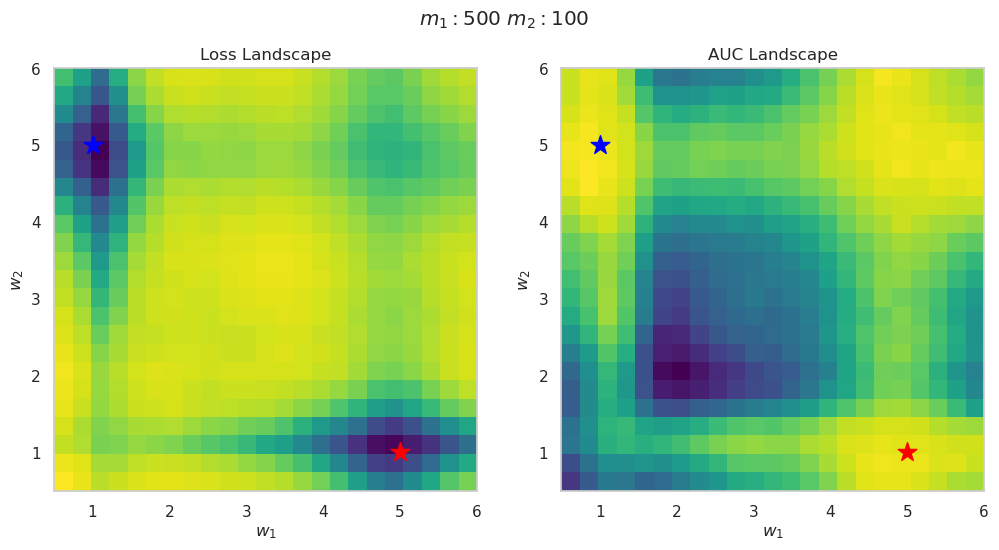

In [170]:
plot_landscapes(0.1, 5, 1, z, a, 0.25, save = True);

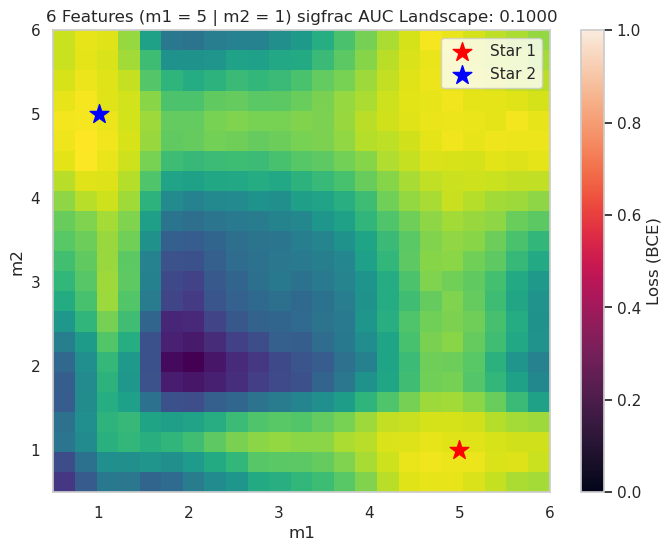

In [173]:
AUC_landscape_nofit(0.1, 5, 1, a, 0.25, False);